In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
# Read the CSV file
df = pd.read_csv('./housing.csv')

In [3]:
# Output the first five rows
pd.set_option('display.max_columns', 8) # hide the extra columns
df.head()

,price,area,bedrooms,bathrooms,...,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,...,yes,2,yes,furnished
1,12250000,8960,4,4,...,yes,3,no,furnished
2,12250000,9960,3,2,...,no,2,yes,semi-furnished
3,12215000,7500,4,2,...,yes,3,yes,furnished
4,11410000,7420,4,1,...,yes,2,no,furnished


In [4]:
# Write the linear regression hypothesis function in vector form
def hypothesis(X, w):
    """
    A function for calculating the linear regression hypothesis in vector form.

    Parameters:
    X (numpy.ndarray): Matrix of features (n x m), where n is the number of samples, m is the number of features.
    w (numpy.ndarray): Vector of parameters (m x 1).

    Returns:
    numpy.ndarray: Predicted values (n x 1).
    """
    ret = np.dot(X, w)
    return ret

In [5]:
# Create a function to calculate the loss function in vector form
def compute_cost(X, y, w):
    """
    Function to calculate the loss function (MSE — Mean Squared Error) in vectorized form.
    
    Parameters:
    X (numpy.ndarray): Feature matrix (n x m).
    y (numpy.ndarray): Vector of true values (n x 1).
    w (numpy.ndarray): Parameter vector (m x 1).

    Returns:
    float: The value of the loss function.
    """
    n = len(y)
    predictions = hypothesis(X, w)
    cost = (1 / (2 * n)) * np.sum((predictions - y) ** 2)
    return cost

In [6]:
# Implement one step of gradient descent
def gradient_step(X, y, w, learning_rate):
    """
    Function to perform one step of gradient descent.
    
    Parameters:
    X (numpy.ndarray): Feature matrix (n x m).
    y (numpy.ndarray): Vector of true values (n x 1).
    w (numpy.ndarray): Parameter vector (m x 1).
    learning_rate (float): Step size for gradient descent.

    Returns:
    numpy.ndarray: Updated parameter vector (m x 1).
    """
    m = len(y)
    predictions = hypothesis(X, w)
    gradient = (1 / m) * np.dot(X.T, (predictions - y))
    w = w - learning_rate * gradient
    return w

In [7]:
# Find the best parameters w for the dataset predicting house price based on square footage, 
# number of bathrooms, and number of bedrooms
df_encoded = pd.get_dummies(df, drop_first=True)
X = df_encoded[['area', 'bathrooms', 'bedrooms']].values
y = df_encoded['price'].values.reshape(-1, 1)
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X = (X - X_mean) / X_std
X_b = np.c_[np.ones((X.shape[0], 1)), X]

# Initialization of parameters
w = np.zeros((X_b.shape[1], 1))
learning_rate = 0.01
n_iterations = 10000
loss_history = []

# Performing a gradient descent
for iteration in range(n_iterations):
    w = gradient_step(X_b, y, w, learning_rate)
    cost = compute_cost(X_b, y, w)
    loss_history.append(cost)
# print(loss_history)
print("The best w parameters found by gradient descent are:")
print(w)

The best w parameters found by gradient descent are:
[[4766729.24770638]
 [ 821214.14349519]
 [ 695808.52272536]
 [ 299983.57107964]]


In [8]:
# Find these same parameters using an analytical solution
w_analytical = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print("Parameters w found analytically:")
print(w_analytical)

Parameters w found analytically:
[[4766729.24770642]
 [ 821214.14349519]
 [ 695808.52272537]
 [ 299983.57107963]]


In [9]:
# To test the predicted values, use LinearRegression from the scikit-learn library,
# and compare the results
model = LinearRegression()
model.fit(X, y)
intercept_sklearn = model.intercept_
coef_sklearn = model.coef_

# Output parameters
print("Parameters of w found by LinearRegression:")
print("Free member:", intercept_sklearn)
print("Coefficients:", coef_sklearn)

# Comparison of results
print("\nComparison of parameters:")
print("Gradient descent:", w.flatten())
print("Analytical solution:", w_analytical.flatten())
print("SciKit-Learn:", np.r_[intercept_sklearn, coef_sklearn.flatten()])

Parameters of w found by LinearRegression:
Free member: [4766729.24770642]
Coefficients: [[821214.14349519 695808.52272537 299983.57107963]]

Comparison of parameters:
Gradient descent: [4766729.24770638  821214.14349519  695808.52272536  299983.57107964]
Analytical solution: [4766729.24770642  821214.14349519  695808.52272537  299983.57107963]
SciKit-Learn: [4766729.24770642  821214.14349519  695808.52272537  299983.57107963]


In [10]:
# Compare the Euclidean distances between parameters
def compare_distances(dist_gd_analytical, dist_gd_sklearn, dist_analytical_sklearn, tolerance=1e-6):
    """
    Function to compare the Euclidean distances between parameters 
    obtained by different methods and to output a conclusion.

    Parameters:
    dist_gd_analytical (float): Distance between gradient descent and analytical solution.
    dist_gd_sklearn (float): Distance between gradient descent and scikit-learn.
    dist_analytical_sklearn (float): Distance between analytical solution and scikit-learn.
    tolerance (float): Threshold value below which distances are considered negligible.

    Returns:
    None
    """
    print("Euclidean distance between the gradient descent parameters and the analytical solution:", dist_gd_analytical)
    print("Euclidean distance between gradient descent parameters and scikit-learn:", dist_gd_sklearn)
    print("Euclidean distance between analytical solution parameters and scikit-learn:", dist_analytical_sklearn)
    print()
    
    # Checking that all distances are less than a threshold value
    if (dist_gd_analytical < tolerance and
        dist_gd_sklearn < tolerance and
        dist_analytical_sklearn < tolerance):
        print("Conclusion: The parameters obtained by gradient descent, analytical solution"
            "and scikit-learn are almost identical. This indicates the correct implementation of the algorithms.")
    else:
        print("Conclusion: There are significant differences between parameters obtained by different methods."
            "It is necessary to check the implementation of algorithms and learning parameters.")

w_gd = w.flatten()
w_analytical = w_analytical.flatten()
w_sklearn = np.r_[intercept_sklearn, coef_sklearn.flatten()]

# Calculation of the Euclidean distance between parameters
distance_gd_analytical = np.linalg.norm(w_gd - w_analytical)
distance_gd_sklearn = np.linalg.norm(w_gd - w_sklearn)
distance_analytical_sklearn = np.linalg.norm(w_analytical - w_sklearn)

compare_distances(distance_gd_analytical, distance_gd_sklearn, distance_analytical_sklearn)

Euclidean distance between the gradient descent parameters and the analytical solution: 5.0159470256528326e-08
Euclidean distance between gradient descent parameters and scikit-learn: 4.635848287457815e-08
Euclidean distance between analytical solution parameters and scikit-learn: 7.034462650309278e-09

Conclusion: The parameters obtained by gradient descent, analytical solutionand scikit-learn are almost identical. This indicates the correct implementation of the algorithms.


In [11]:
# New data for prediction
area_new = 40  # Area (assumed to be in the same units as the training data)
bathrooms_new = 1  # Number of bathrooms
bedrooms_new = 1  # Number of bedrooms

# Normalization of new data using the mean and standard deviation of the training data
X_new = np.array([[area_new, bathrooms_new, bedrooms_new]])
X_new_normalized = (X_new - X_mean) / X_std

# Adding a column of ones
X_new_b = np.c_[np.ones((X_new_normalized.shape[0], 1)), X_new_normalized]

# Using the parameters obtained from gradient descent
price_prediction_gd = hypothesis(X_new_b, w)

# Using the parameters obtained from the analytical solution
price_prediction_analytical = hypothesis(X_new_b, w_analytical)

# Using the scikit-learn model
price_prediction_sklearn = model.predict(X_new_normalized)

print("Predicted price (gradient descent):", price_prediction_gd[0][0])
print("Predicted price (analytical solution):", price_prediction_analytical)
print("Predicted price (scikit-learn):", price_prediction_sklearn[0])

Predicted price (gradient descent): 1634848.4340708838
Predicted price (analytical solution): [1634848.43407096]
Predicted price (scikit-learn): [1634848.43407095]


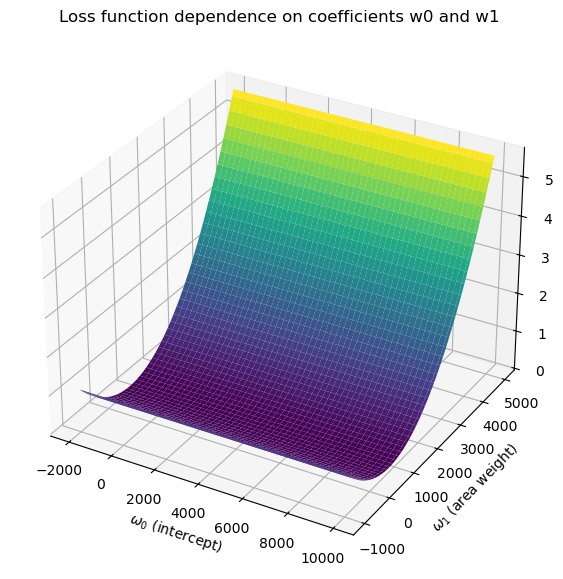

In [12]:
# Assume X is your data, for example, the area of the house
X = df[['area']].values  # Using the area of the house as the input feature
y = df['price'].values  # Target variable - price

# Parameters for the grid of coefficients
w0 = np.linspace(-2000, 10000, 100)  # Range for w0
w1 = np.linspace(-1000, 5000, 100)  # Range for w1

W0, W1 = np.meshgrid(w0, w1)

# Loss function (MSE) for each combination of coefficients
def compute_loss(X, y, w0, w1):
    predictions = w0 + w1 * X  # Linear equation for prediction
    return np.mean((predictions - y) ** 2)  # MSE

# Calculate the loss values for each combination of w0 and w1
loss = np.array([[compute_loss(X, y, w0_i, w1_j) for w0_i in w0] for w1_j in w1])

# Plotting the graph
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plotting the surface
ax.plot_surface(W0, W1, loss, cmap='viridis', edgecolor='none')

# Setting up the axes
ax.set_title('Loss function dependence on coefficients w0 and w1')
ax.set_xlabel(r'$\omega_0$ (intercept)')
ax.set_ylabel(r'$\omega_1$ (area weight)')
ax.set_zlabel('Loss function (MSE)')

plt.show()

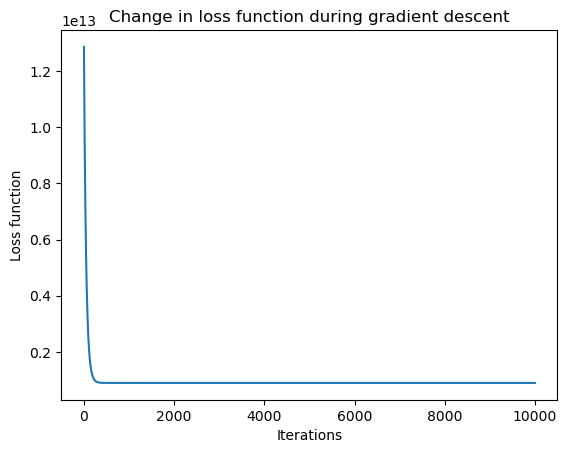

In [13]:
# Change in loss function during gradient descent
plt.plot(loss_history)
plt.xlabel('Iterations')
plt.ylabel('Loss function')
plt.title('Change in loss function during gradient descent')
plt.show()